In [2]:
# Import libraries / packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import dataset
df = pd.read_csv('dataset.csv')

# Declare feature vector and target variable
X = df.drop('class', axis=1)
y = df['class']

In [4]:
# Split data into training dataset (80%) and testing dataset (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Import SVC classifier
from sklearn.svm import SVC

# Instantiate classifier with default hyperparameters
svc = SVC() 

# Fit classifier to training set
svc.fit(X_train, y_train)

# Make predictions on test set
y_pred = svc.predict(X_test)

In [6]:
# Compute and print accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9500


In [7]:
# Stratified k-Fold Cross Validation with shuffle split with linear kernel

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

linear_svc = SVC(kernel='linear')

linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [8]:
# Print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.95       0.95714286 0.96428571 0.97142857 0.97857143]


In [9]:
# Print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9643


In [10]:
rbf_svc = SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [11]:
# Print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.95       0.95714286 0.96428571 0.98571429 0.98571429]


In [12]:
# Print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9686


In [13]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import SVC classifier
from sklearn.svm import SVC

# Instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc = SVC() 

# Declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01, 0.02, 0.03, 0.04, 0.05]} 
              ]



grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [14]:
# Examine the best model

# Print parameters that give the best results
print('Parameters that give the best results:', (grid_search.best_params_))

# Get the best estimator that was chosen by the GridSearch
best_svm = grid_search.best_estimator_
print('\n\nEstimator that was chosen by the search:', (best_svm))

# Evaluate the best model on the test set
y_pred_best = best_svm.predict(X_test)

# Compute accuracy score
best_accuracy = accuracy_score(y_test, y_pred_best)

# Print the accuracy score of the best model
print('\n\n', 'Model accuracy score with best hyperparameters: {:.4f}'.format(best_accuracy))

Parameters that give the best results: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search: SVC(C=10, gamma=0.1)


 Model accuracy score with best hyperparameters: 0.9571


In [15]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[81  5]
 [ 1 53]]

True Positives(TP) =  81

True Negatives(TN) =  53

False Positives(FP) =  5

False Negatives(FN) =  1


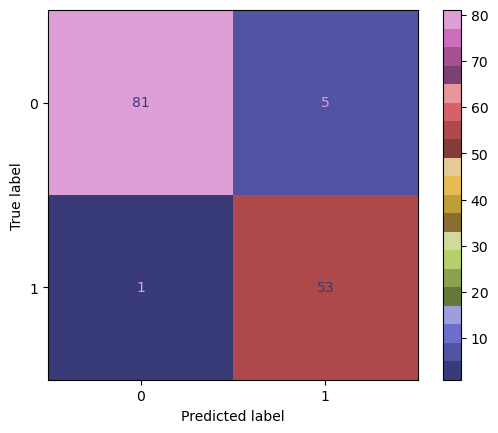

In [16]:
# Visualise confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='tab20b')


In [17]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        86
           1       0.91      0.98      0.95        54

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [18]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [19]:
# Print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9571


In [20]:
# Print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0429


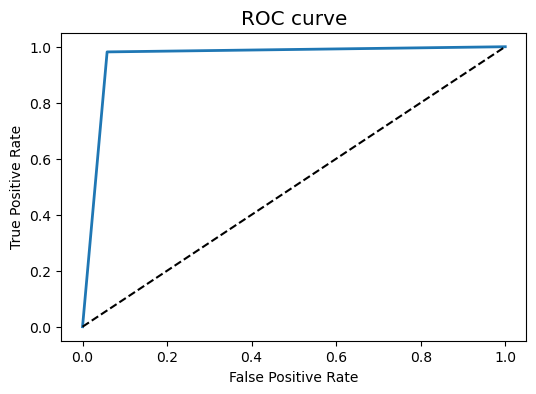

In [21]:
# Plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

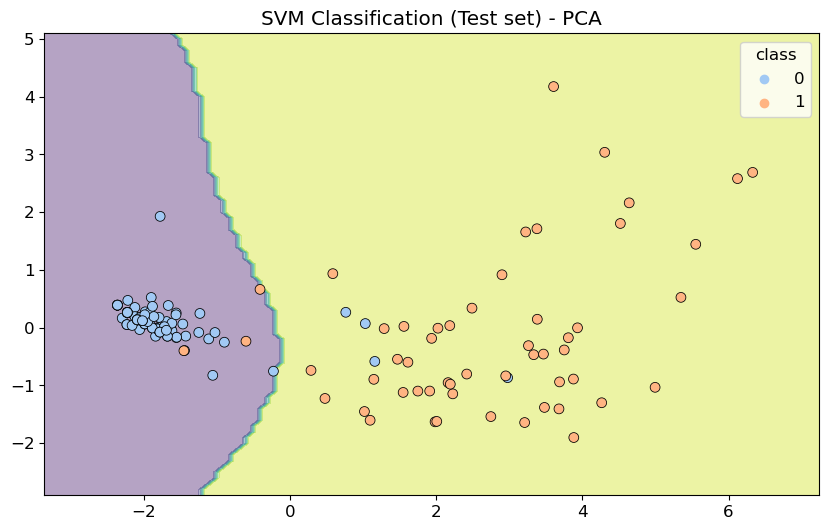

In [22]:
# Make a decision boundary plot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train SVM model
best_svm.fit(X_reduced, y_test)

# Creating meshgrid for visualisation
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Making predictions on the meshgrid points
Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshaping Z
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)

# Plotting the data points
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_test, palette="pastel", edgecolor='k', s=50)

# Adding title
plt.title('SVM Classification (Test set) - PCA')

plt.show()